In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e14/sample_submission.csv
/kaggle/input/playground-series-s3e14/train.csv
/kaggle/input/playground-series-s3e14/test.csv


## Data Explorating

In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s3e14/train.csv')
df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [3]:
df.shape

(15289, 18)

In [4]:
df.dtypes

id                        int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

In [5]:
df.describe()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,7644.000000,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,4413.698468,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,3822.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,7644.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,11466.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,15288.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


### Feature Description

Input Feature:
- Clonesize (m2) = The average blueberry clone size in the field. * Quantitative variable / continuous variable
- Honeybee (bees/m2/min) = Honeybee density in the field. * Quantitative variable / continuous variable
- Bumbles (bees/m2/min) = Bumblebee density in the field. * Quantitative variable / continuous variable
- Andrena (bees/m2/min) = Andrena bee density in the field. * Quantitative variable / continuous variable
- Osmia (bees/m2/min) = Osmia bee density in the field. * Quantitative variable / continuous variable
- MaxOfUpperTRange (℃) = The highest record of the upper band daily air temperature during the bloom season. * Quantitative variable / continuous variable
- MinOfUpperTRange (℃) = The lowest record of the upper band daily air temperature. * Quantitative variable / continuous variable
- AverageOfUpperTRange (℃) = The average of the upper band daily air temperature. * Quantitative variable / continuous variable
- MaxOfLowerTRange (℃) = The highest record of the lower band daily air temperature. * Quantitative variable / continuous variable
- MinOfLowerTRange (℃) = The lowest record of the lower band daily air temperature. * Quantitative variable / continuous variable
- AverageOfLowerTRange (℃) = The average of the lower band daily air temperature. * Quantitative variable  / continuous variable
- RainingDays (Day) = The total number of days during the bloom season, each of which has precipitation larger than zero. * Quantitative variable / discrete variable
- AverageRainingDays (Day) = The average of raining days of the entire bloom season. * Quantitative variable / continuous variable

Output Feature:
- Yield (Number) = Yield wild blueberry. * Quantitative variable / discrete variable but in this dataset we have continuous variable.

Source: https://www.kaggle.com/datasets/shashwatwork/wild-blueberry-yield-prediction-dataset

## Data Cleaning

In [6]:
# Remove column id. 
df = df.drop(["id"], axis = 1)

In [7]:
def Data_Cleaning(df):
    print("Missing values in distribution: \n")
    print(df.isnull().mean())
    
    print(50 *"-")
    
    print("\nColumn datatypes: \n")
    print(df.dtypes)
    
    print(50 *"-")

    print("\nDuplicated row: \n")
    print(df.duplicated().sum())
    
    print(50 *"-")
    
    if df.duplicated().sum() >= 1:
        print("\nRemove duplicated row: Yes or No\n")
        x = input("Enter:")
        if x == "Yes":
            df = df.drop_duplicates()
            df = df.reset_index()
            df = df.drop(["index"], axis = 1)
            print("Succesful removed")
            print("\nDuplicated row: \n")
            print(df.duplicated().sum())
            return df
        else:
            print("You have still duplicated row")
            return df
    else:
        return df

In [9]:
df = Data_Cleaning(df)

Missing values in distribution: 

clonesize               0.0
honeybee                0.0
bumbles                 0.0
andrena                 0.0
osmia                   0.0
MaxOfUpperTRange        0.0
MinOfUpperTRange        0.0
AverageOfUpperTRange    0.0
MaxOfLowerTRange        0.0
MinOfLowerTRange        0.0
AverageOfLowerTRange    0.0
RainingDays             0.0
AverageRainingDays      0.0
fruitset                0.0
fruitmass               0.0
seeds                   0.0
yield                   0.0
dtype: float64
--------------------------------------------------

Column datatypes: 

clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays 

Enter: Yes


Succesful removed

Duplicated row: 

0


## Feature Selection

"Why don't we give all the features to the ML algorithm and let it decide which feature is important? ~ Rahul Agarwal" 

While it may be tempting to give all the features to a machine learning algorithm and let it decide which features are important, there are several reasons why this approach may not be ideal. 

- Overfitting [Irrelevant or redundant features in a model can lead to overfitting, which occurs when a model it too complex and performs well on the training data but poorly on new, unseen data]. 

- Interpretability [All features in a model can make it more difficult to interpret the result and understand which features are most important for making accurate predictions. So we want that our "models to be simple"]

- Data quality [All available features can also increase the risk of including noisy or irrelevant data, which can negatively impact the accuracy of the model].

- Increased computational complexity [ All available features in a machine learning model can significantly increase the computational complexity of the model, which can make it more difficult and time-consuming to train and evaluate]

Source: https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2

For this episode we gonna use three types of feature selection: Wrapper methods, Filter methods and Embedded methods. If u need more explanation about this three types of feature selection. I wanna say go to this page --> https://towardsdatascience.com/intro-to-feature-selection-methods-for-data-science-4cae2178a00a

### Wrapper methods - Forward Feature Selection

In [10]:
import statsmodels.api as sm

def forward_selection(df, target, significance_level=0.05):
    initial_features = df.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(df[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
        
    return best_features

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
X = df.drop(["yield"], axis = 1)
y = df["yield"]

forward_selection(X,y)

['seeds',
 'fruitset',
 'fruitmass',
 'AverageRainingDays',
 'AverageOfUpperTRange',
 'MinOfLowerTRange',
 'clonesize',
 'bumbles',
 'andrena']

**The forward feature selection is performed on the dataset using Ordinary Least Square regression method. The selected feature are: fruitset, seeds, fruitmass, AverageRainingDays, AveragreOfUpperTRange, MinOfLowerTRange, clonesize, bumbles and andrena. These features were selected based on their statistical significance in predicting the target variable "Yield".**

### Filter methods - Correlation based feature selection (Spearman's rank coefficient)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(20,20))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.880078,0.093719,0.099511,0.042579,0.014559,0.014277,0.014499,0.014783,0.014474,0.014491,0.166960,0.166537,-0.403750,-0.364148,-0.386334,-0.381952
honeybee,0.880078,1.000000,0.130717,0.213800,0.149740,0.013126,0.012834,0.013064,0.013373,0.013038,0.012981,0.135290,0.133549,-0.313604,-0.280291,-0.300096,-0.295978
bumbles,0.093719,0.130717,1.000000,-0.172181,0.108535,-0.001471,-0.001259,-0.001266,-0.001045,-0.001246,-0.001192,-0.069006,-0.064380,0.161449,0.158815,0.171931,0.166844
andrena,0.099511,0.213800,-0.172181,1.000000,0.217551,-0.010356,-0.010264,-0.010331,-0.010232,-0.010334,-0.010353,-0.025977,-0.024332,0.050535,0.050701,0.049653,0.054694
osmia,0.042579,0.149740,0.108535,0.217551,1.000000,-0.027181,-0.026487,-0.027216,-0.027225,-0.027286,-0.027124,-0.077145,-0.072733,0.150764,0.144263,0.152105,0.149280
MaxOfUpperTRange,0.014559,0.013126,-0.001471,-0.010356,-0.027181,1.000000,0.998647,0.999864,0.999562,0.999856,0.999699,0.010488,0.009330,0.024723,0.158100,0.067682,-0.017131
MinOfUpperTRange,0.014277,0.012834,-0.001259,-0.010264,-0.026487,0.998647,1.000000,0.998991,0.998342,0.998983,0.999139,0.011063,0.009904,0.024878,0.158269,0.067894,-0.016877
AverageOfUpperTRange,0.014499,0.013064,-0.001266,-0.010331,-0.027216,0.999864,0.998991,1.000000,0.999559,0.999979,0.999936,0.010640,0.009481,0.024737,0.158142,0.067736,-0.017121
MaxOfLowerTRange,0.014783,0.013373,-0.001045,-0.010232,-0.027225,0.999562,0.998342,0.999559,1.000000,0.999551,0.999393,0.010540,0.009382,0.024645,0.157861,0.067645,-0.017081
MinOfLowerTRange,0.014474,0.013038,-0.001246,-0.010334,-0.027286,0.999856,0.998983,0.999979,0.999551,1.000000,0.999928,0.010673,0.009514,0.024802,0.158198,0.067802,-0.017069


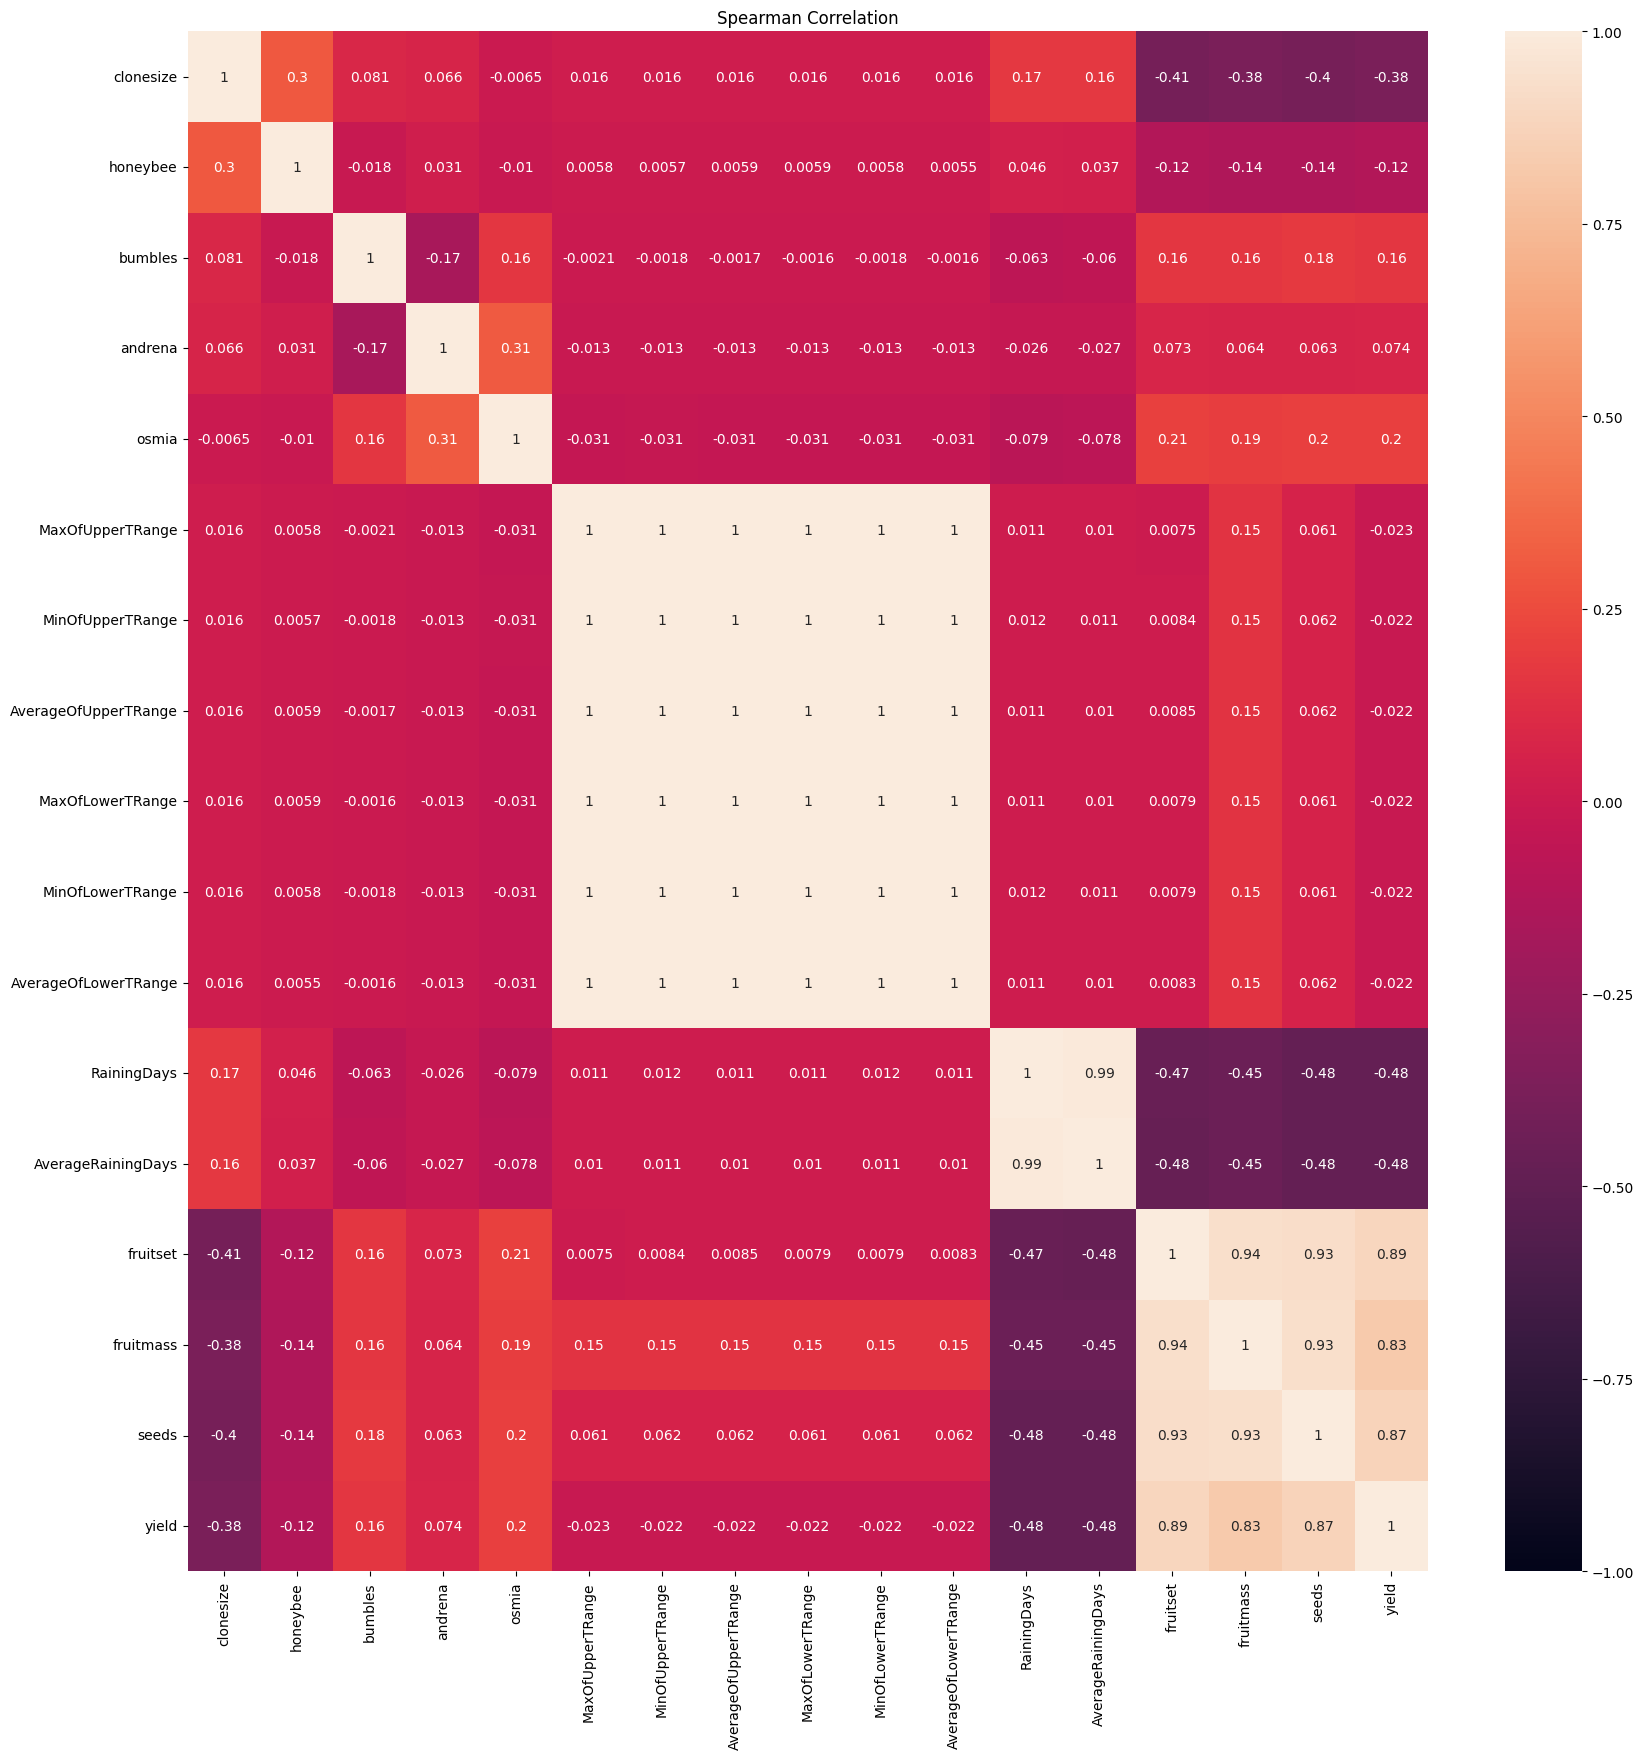

In [13]:
display_correlation(df)

**This method selects features based on their correlation with the target variable. You can calculate the correlation between each feature and the target variable, and select the features with the highest correlation value. So for this we gonna choose correlation above 0,4. --> RainingDays, AverageRainingDays, fruitset, fruitmass and seeds.**

### Embedded methods - Feature Importance

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
feature_names = X_train.columns.tolist()
model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

print(forest_importances)

clonesize               0.003930
honeybee                0.003905
bumbles                 0.004735
andrena                 0.011130
osmia                   0.009865
MaxOfUpperTRange        0.002547
MinOfUpperTRange        0.002603
AverageOfUpperTRange    0.002689
MaxOfLowerTRange        0.002534
MinOfLowerTRange        0.002633
AverageOfLowerTRange    0.002580
RainingDays             0.007249
AverageRainingDays      0.006626
fruitset                0.757970
fruitmass               0.040103
seeds                   0.138901
dtype: float64


**Here we can see that fruitset, seeds, andrena and fruitmass are important.**

### Methods - Conclusion

Wrapper methods --  fruitset, seeds, fruitmass, AverageRainingDays, AveragreOfUpperTRange, MinOfLowerTRange, clonesize, bumbles and andrena.

Filter methods -- RainingDays, AverageRainingDays, fruitset, fruitmass and seeds.

Embedded methods - fruitset, seeds, andrena and fruitmass, osmia.

**For this research we gonna use this inputvariable: fruitset(3x), seeds(3x), fruitmass(3x), AverageRainingDays(2x), andrena(2x), AverageOfUpperTRange(1x), MinOfLowerTRange(1x), clonesize(1x), bumbles(1x), RainingDays(1x) and osmia(1x).**

## Model

In [15]:
df1 = df[["fruitset","seeds","fruitmass","AverageRainingDays","andrena","AverageOfUpperTRange","MinOfLowerTRange","clonesize","bumbles","RainingDays"
          ,"osmia","yield"]]
df2 = df[["fruitset","seeds","fruitmass","AverageRainingDays","andrena","yield"]]
df3 = df[["fruitset","seeds","fruitmass","yield"]]

X1 = df1.drop(["yield"], axis = 1)
y1 = df1["yield"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, stratify=y1, random_state=42)

X2 = df2.drop(["yield"], axis = 1)
y2 = df2["yield"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, stratify=y2, random_state=42)

X3 = df3.drop(["yield"], axis = 1)
y3 = df3["yield"]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, stratify=y3, random_state=42)

### Decision Tree

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn import tree 
from matplotlib import pyplot

def Decision_Tree(X_train, y_train, X_test, y_test, text = "Dataset1"):
    # Define the tree depths to evaluate:
    depths = [ i for i in range(1, 21)]

    # Empty lists:
    train_score = []
    test_score = []

    # For loop for all tree depths.
    print(f"Results {text}:\n")
    for i in depths:
        model = tree.DecisionTreeRegressor(max_depth= i) #Run the model.
        model = model.fit(X_train, y_train) #Train the model.

        y_pred_train = model.predict(X_train) #With that model lets predict.
        mean_squared_log_train = mean_absolute_error(y_train, y_pred_train) #Calculate the MSLE.
        train_score.append(mean_squared_log_train) #Append to the list.

        y_pred_test = model.predict(X_test)
        mean_squared_log_test = mean_absolute_error(y_test, y_pred_test)
        test_score.append(mean_squared_log_test)
        print('>%d, train: %.3f, test: %.3f' % (i, mean_squared_log_train, mean_squared_log_test))
    
    print("\nPlot the results:\n")
    pyplot.plot(depths, train_score, '-o', label='Train') #Plot the trainscore.
    pyplot.plot(depths, test_score, '-o', label='Test') #Plot the testscore.
    pyplot.legend()
    pyplot.show() #Show the plot.

Results Dataset1:

>1, train: 715.826, test: 712.501
>2, train: 476.935, test: 475.311
>3, train: 407.927, test: 408.315
>4, train: 379.905, test: 382.840
>5, train: 365.441, test: 370.747
>6, train: 352.258, test: 365.151
>7, train: 342.196, test: 371.331
>8, train: 330.459, test: 374.756
>9, train: 314.328, test: 383.528
>10, train: 295.005, test: 392.138
>11, train: 270.619, test: 407.785
>12, train: 244.424, test: 420.774
>13, train: 215.385, test: 435.974
>14, train: 182.813, test: 452.403
>15, train: 154.671, test: 466.840
>16, train: 127.130, test: 479.317
>17, train: 101.009, test: 490.655
>18, train: 78.223, test: 496.434
>19, train: 57.898, test: 513.060
>20, train: 41.826, test: 512.608

Plot the results:



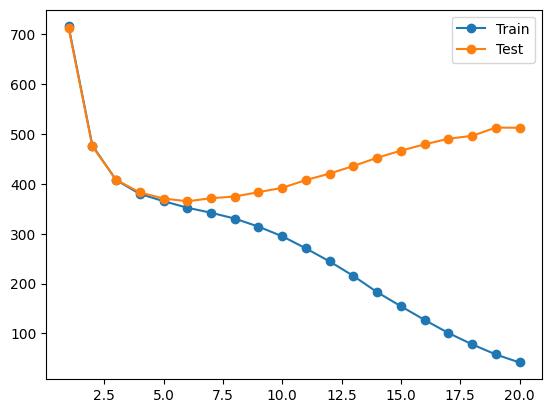

In [17]:
Decision_Tree(X_train1, y_train1, X_test1, y_test1, "Dataset1")

Results Dataset2:

>1, train: 715.826, test: 712.501
>2, train: 476.935, test: 475.311
>3, train: 407.927, test: 408.315
>4, train: 378.483, test: 380.368
>5, train: 365.540, test: 369.869
>6, train: 353.130, test: 365.355
>7, train: 343.221, test: 371.552
>8, train: 332.038, test: 377.618
>9, train: 316.365, test: 384.160
>10, train: 296.638, test: 392.573
>11, train: 273.805, test: 409.515
>12, train: 249.855, test: 423.821
>13, train: 223.247, test: 434.956
>14, train: 197.082, test: 445.392
>15, train: 169.846, test: 452.608
>16, train: 143.418, test: 465.531
>17, train: 119.103, test: 474.275
>18, train: 96.784, test: 482.211
>19, train: 77.798, test: 495.097
>20, train: 59.025, test: 502.112

Plot the results:



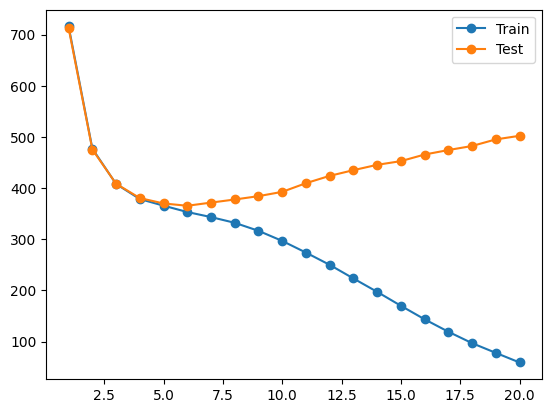

In [18]:
Decision_Tree(X_train2, y_train2, X_test2, y_test2, "Dataset2")

Results Dataset3:

>1, train: 715.826, test: 712.501
>2, train: 476.935, test: 475.311
>3, train: 407.927, test: 408.315
>4, train: 378.283, test: 379.435
>5, train: 365.479, test: 369.788
>6, train: 352.022, test: 363.698
>7, train: 342.882, test: 366.104
>8, train: 332.021, test: 373.190
>9, train: 318.361, test: 380.165
>10, train: 302.245, test: 391.103
>11, train: 282.756, test: 401.849
>12, train: 262.857, test: 414.208
>13, train: 239.183, test: 428.092
>14, train: 216.401, test: 434.214
>15, train: 191.500, test: 439.161
>16, train: 169.692, test: 454.526
>17, train: 146.185, test: 461.777
>18, train: 124.553, test: 465.532
>19, train: 103.462, test: 477.621
>20, train: 85.015, test: 485.726

Plot the results:



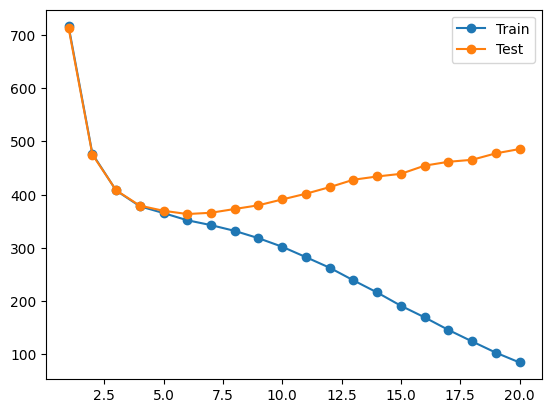

In [19]:
Decision_Tree(X_train3, y_train3, X_test3, y_test3, "Dataset3")

From the results that dataset1 best score is: train: 352.258, test: 365.151 by depth 6, dataset2 best score is: train: 353.130, test: 365.355 by depth 6 and dataset3 best score is: train: 352.022, test: 363.698. So, the conclusion is that dataset3 the best is!

In [ ]:
model = tree.DecisionTreeRegressor(max_depth= 6) 
model = model.fit(X_train3, y_train3) 

test = pd.read_csv('/kaggle/input/playground-series-s3e14/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s3e14/sample_submission.csv')

test = test[["fruitset","seeds","fruitmass"]]

Result = model.predict(test) 
submission_id = submission['id'] 

prediction = pd.DataFrame(Result, columns=['yield'], index=submission_id).to_csv('Perdiction3_DecisionTree.csv')